Trial 5 Complete [00h 00m 10s]
val_accuracy: 0.05000000074505806

Best val_accuracy So Far: 0.15000000596046448
Total elapsed time: 00h 00m 53s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


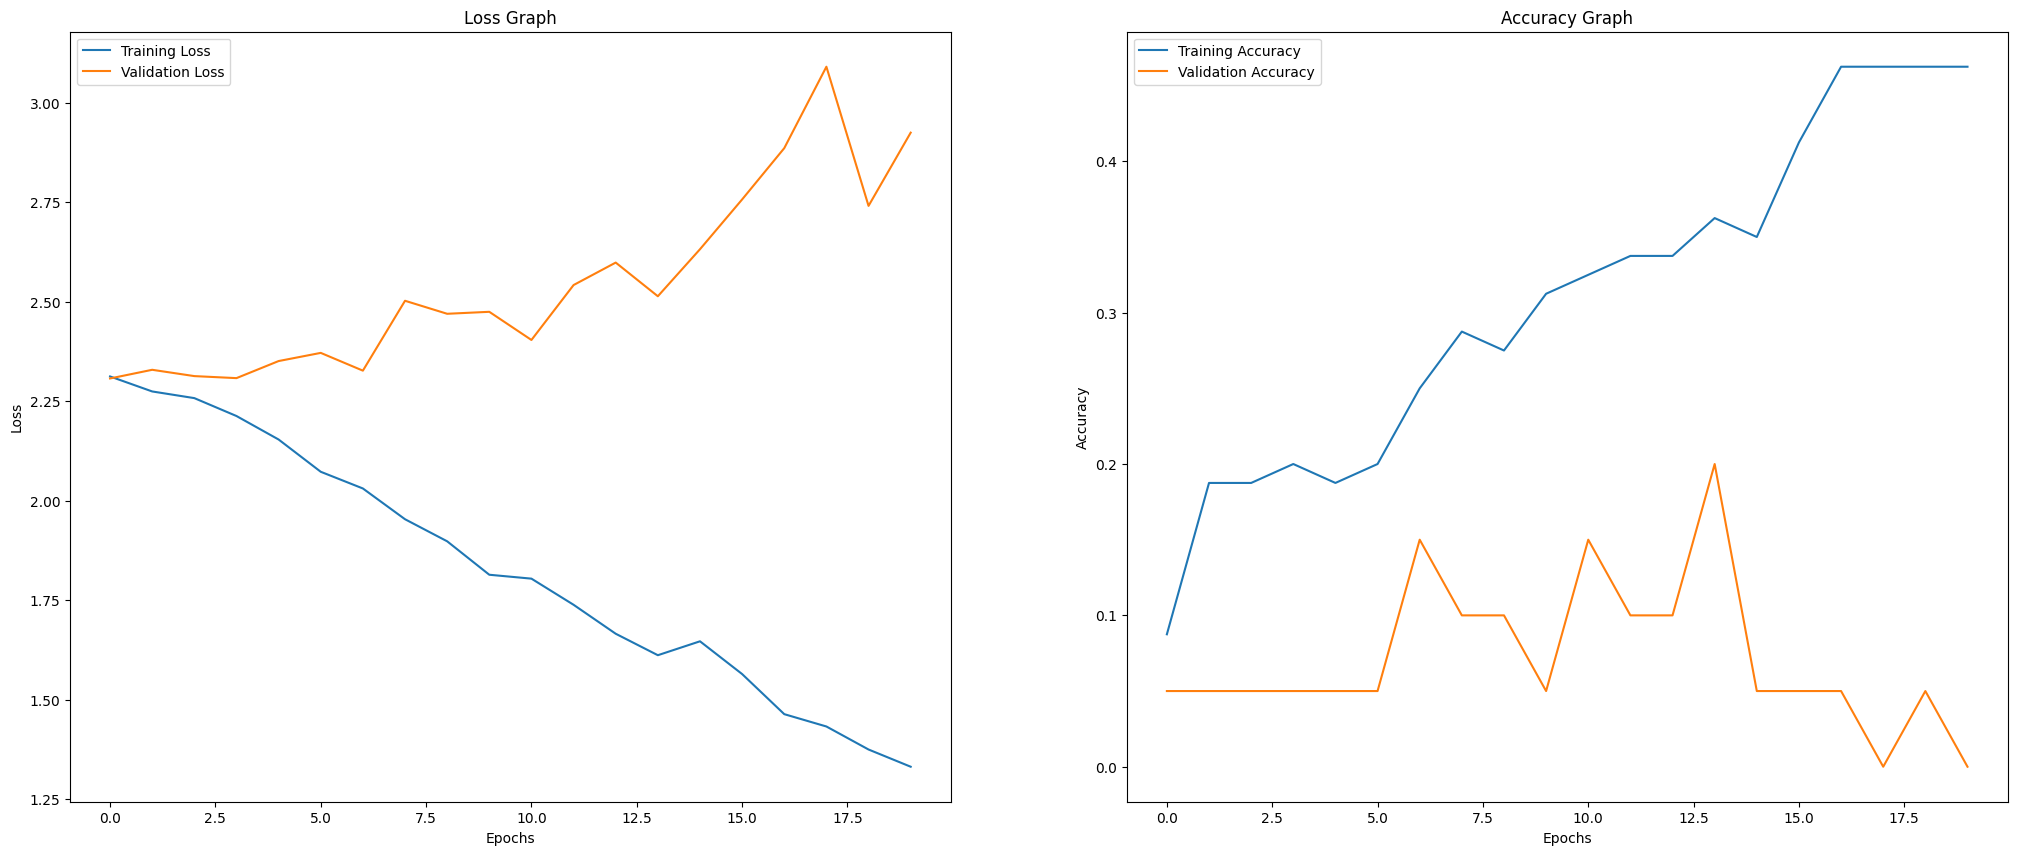

In [ ]:
!pip install keras-tuner

from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner.tuners import RandomSearch

(x_train, y_train), (x_test, y_test)=cifar10.load_data()



#-->kücük bir sample ile calısmak icin bunu yazdık. kod calısıyor mu calısmıyor mu kısa sürede anlamak icin
x_train=x_train[:100]
x_test=x_test[:50]
y_train=y_train[:100]
y_test=y_test[:50]



x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.2, random_state=0)

row,column,layer=x_train.shape[1:]



def build_model(hp):
  model=Sequential()


  model.add(Conv2D(
      filters=hp.Int("filter_1", min_value=32, max_value=128, step=16),
      kernel_size=hp.Choice("kernel_1", values=[3,5]),
      activation="relu",
      input_shape=(row,column,layer)))

  model.add(Dropout(hp.Float("dropout_1", min_value=0.0, max_value=0.5, step=0.1)))



  model.add(Conv2D(
      filters=hp.Int("filter_2", min_value=32, max_value=128, step=16),
      kernel_size=hp.Choice("kernel_2", values=[3,5]),
      activation="relu"))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(hp.Float("dropout_2", min_value=0.0, max_value=0.5, step=0.1)))

  model.add(Flatten())

  model.add(Dense(
      hp.Int("unit_1", min_value=16, max_value=256, step=16),
      activation="relu"))


  model.add(Dense(
      hp.Int("unit_2", min_value=16, max_value=32, step=16),
      activation="relu"))

  model.add(Dense(10, activation="softmax"))

  model.compile(
      optimizer=Adam(hp.Choice("learning_rate", values=[0.01, 0.001])),
      loss="categorical_crossentropy",
      metrics=["accuracy"])

  return model


tuner=RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5)

tuner.search(x_train, y_train, epochs=3, validation_data=(x_val, y_val))

best_model=tuner.get_best_models()[0]

output=best_model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), verbose=0)


fig,ax=plt.subplots(1,2, figsize=(25,10))

ax[0].plot(output.history["loss"], label="Training Loss")
ax[0].plot(output.history["val_loss"], label="Validation Loss")
ax[0].set_title("Loss Graph")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(output.history["accuracy"], label="Training Accuracy")
ax[1].plot(output.history["val_accuracy"], label="Validation Accuracy")
ax[1].set_title("Accuracy Graph")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()
